In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../proc_data/cstr.csv")
print(df.head())
y = df['class']
X = df.drop('class', axis=1)

   Unnamed: 0   feature1   feature2  class
0           0  41.322630  10.776732    0.0
1           1  40.282010  12.140834    0.0
2           2  43.180370  11.824053    0.0
3           3  42.052227  15.140845    0.0
4           4  41.748140  16.027851    0.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
np.unique(y_test, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([36, 45, 55, 39, 58, 43, 40, 40, 38, 44, 48, 35, 51]))

In [5]:
np.unique(y_train, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([184, 175, 165, 181, 162, 177, 180, 180, 182, 176, 172, 185, 169]))

### KNN 

In [17]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(X_train)

/home/adithya/Dev/CL688 Project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=13, random_state=42)

In [18]:
y_pred_train = kmeans.predict(X_train)
cluster_to_actual_class = {}
for cluster_label in range(13):
    cluster_indices = np.where(y_pred_train == cluster_label)
    y_train_array = y_train.to_numpy()
    cluster_labels = y_train_array[cluster_indices]
    cluster_labels = cluster_labels.astype(int)
    majority_class = np.bincount(cluster_labels).argmax()
    cluster_to_actual_class[cluster_label] = majority_class

print(cluster_to_actual_class)

{0: 8, 1: 2, 2: 9, 3: 3, 4: 4, 5: 0, 6: 1, 7: 1, 8: 5, 9: 6, 10: 2, 11: 3, 12: 0}


0.05244755244755245
0.026007017912565066


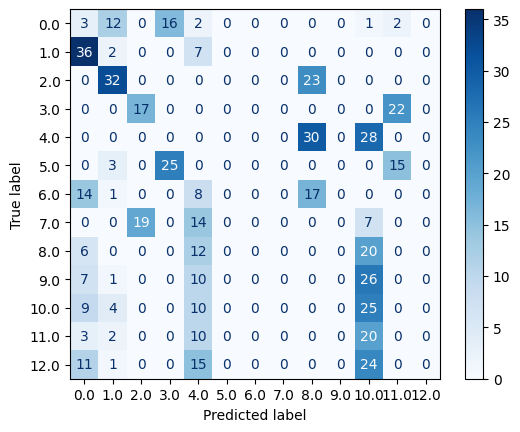

In [21]:
y_pred_test = kmeans.predict(X_test)
y_pred = np.array([cluster_to_actual_class[cluster_label] for cluster_label in y_pred_test])

from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [23]:
y_pred_train_switch = np.array([cluster_to_actual_class[cluster_label] for cluster_label in y_pred_train])

print(accuracy_score(y_train, y_pred_train_switch))

0.05026223776223776
